In [1]:
import pandas as pd
import json
import numpy as np
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('pdf', fonttype=42)
matplotlib.rc('ps', fonttype=42)

import os
sns.set(font_scale=1.25, style='whitegrid')
sns.set(palette='magma')

figdir = '../paper/'

print('figdir:',figdir)

def save(name='tmp',h=None):
    name = name.strip().replace(' ','-').replace('%','pct')
    if h == None:
        h = plt.gcf()
    h.tight_layout()
    print('saving',figdir+'/'+name+'.pdf')
    if not os.path.exists(figdir):
        os.makedirs(figdir)
    plt.savefig(figdir+'/'+name+'.pdf', bbox_inches='tight')
    
symbolic_algs = [
    'AFP', 
    'AFP_FE',
    'BSR',
    'DSR',
    'FFX',

    # brush with mabs
    'Baseline',
    'B-wo-split',
    "C-D-UCB1",
    "C-D-TS",
    "D-UCB1",
    "D-TS",

    # Feat split lexicase exeriments
    'FEAT S-Split',
    'FEAT SD-Split',
    'FEAT D-Split',
    'FEAT',

    'EPLEX',
    'GP-GOMEA',
    'gplearn',
    'ITEA', 
    'MRGP', 
    'Operon',
    'SBP-GP',
    'AIFeynman'
]

nongp_algs = [
    'BSR',
    'DSR',
    'AIFeynman'
]

gp_algs = [
    'AFP', 
    'AFP_FE',
    'FFX',

    'FEAT S-Split',
    'FEAT SD-Split',
    'FEAT D-Split',
    'FEAT',

    # brush with mabs
    'Baseline',
    'B-wo-split',
    "C-D-UCB1",
    "C-D-TS",
    "D-UCB1",
    "D-TS",

    'EPLEX',
    'GP-GOMEA',
    'gplearn',
    'ITEA', 
    'MRGP', 
    'Operon',
    'SBP-GP',
]

figdir: ../paper/


In [2]:
df_sum = pd.read_csv('../results/results_black-box_summary.csv.gz',
                     compression='gzip')

df_sum

,algorithm,dataset,random_state,training time (s),mse_test,mae_test,r2_test,model_size,training time (hr),r2_zero_test,...,r2_test_rank,r2_test_norm,model_size_rank,model_size_norm,r2_zero_test_rank,r2_zero_test_norm,rmse_test_rank,rmse_test_norm,log_mse_test_rank,log_mse_test_norm
0,AFP,1027_ESL,13879.5,1210.966865,0.365049,0.442612,0.830930,20.5,0.336380,0.830930,...,18.0,0.922184,10.0,0.000770,18.0,0.922184,19.0,0.139514,19.0,0.123830
1,AFP,1028_SWD,13879.5,3017.658321,0.438023,0.538419,0.314517,47.0,0.838238,0.314517,...,19.0,0.835045,14.0,0.000378,19.0,0.808090,21.0,0.216281,21.0,0.208446
2,AFP,1029_LEV,13879.5,2622.206193,0.433124,0.508817,0.521904,23.5,0.728391,0.521904,...,18.0,0.939429,10.5,0.000229,18.0,0.934869,18.0,0.075124,18.0,0.070675
3,AFP,1030_ERA,13879.5,3007.024177,2.496171,1.299746,0.358716,36.5,0.835284,0.358716,...,18.0,0.919178,15.0,0.003315,18.0,0.917586,16.0,0.066810,16.0,0.070855
4,AFP,1089_USCrime,13879.5,590.939726,549.423049,18.823004,0.639671,25.0,0.164150,0.639671,...,21.0,0.822717,12.0,0.001007,21.0,0.780937,20.0,0.200320,20.0,0.286474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,gplearn,687_sleuth_ex1605,13879.5,26662.282274,107.479353,8.918893,0.373679,14.5,7.406190,0.373679,...,10.0,0.997806,8.0,0.000238,10.0,0.779652,4.0,0.005244,4.0,0.018221
3101,gplearn,690_visualizing_galaxy,13879.5,21162.593308,399.074818,15.693803,0.953191,16.0,5.878498,0.953191,...,18.5,0.923560,4.0,0.000040,18.5,0.923560,19.0,0.140843,19.0,0.230959
3102,gplearn,695_chatfield_4,13879.5,28398.484904,311.234213,11.696317,0.843542,1.0,7.888468,0.843542,...,5.0,0.997885,1.0,0.000000,5.0,0.974512,10.0,0.010673,10.0,0.038788
3103,gplearn,706_sleuth_case1202,13879.5,22506.032915,3185.450642,40.642813,0.661283,11.5,6.251676,0.661283,...,2.0,0.999864,8.0,0.001220,2.0,0.994737,3.0,0.009024,3.0,0.029265


/tmp/ipykernel_113687/4245788707.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_clustermap = df_clustermap[["dataset", "*algorithm*", "r2_test_rank"]]\


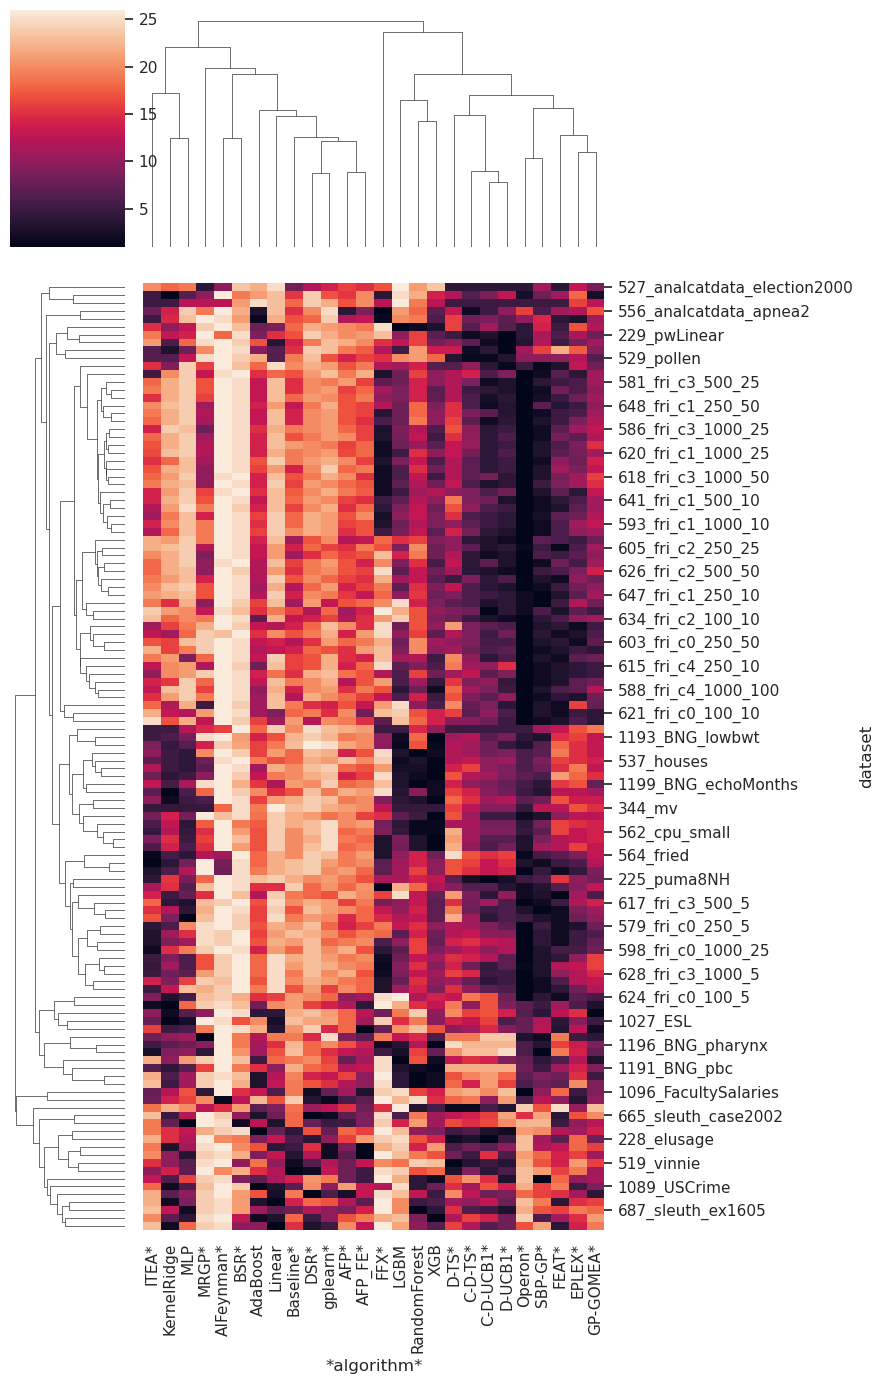

In [3]:
df_clustermap = df_sum.copy() #.loc[df_sum.algorithm.isin(symbolic_algs)]

df_clustermap['*algorithm*'] = df_clustermap['algorithm'].apply(lambda x: x+'*' if x in symbolic_algs else x)

df_clustermap = df_clustermap[["dataset", "*algorithm*", "r2_test_rank"]]\
        .groupby(["dataset", "*algorithm*"]).mean().reset_index()\
        .pivot("dataset", columns="*algorithm*").fillna(df_clustermap["*algorithm*"].nunique())

df_clustermap.columns = df_clustermap.columns.droplevel()

g = sns.clustermap(
    df_clustermap,
    figsize=(9, 14)
)

plt.tight_layout()